# Example for lensed quasar

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yaml' files for each lens system,
        - **masks**: contains the custom 'mask_{lens_name}_{band}.npy' files (optional),
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_variance_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yaml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### Imports

In [1]:
from dolphin.processor import Processor
from dolphin.analysis.output import Output

import matplotlib.pyplot as plt
import numpy as np

### create a `Processor` instance and point to the IO directory

In [2]:
processor = Processor("../io_directory_example/")

### Run a model by calling the  `swim()` method

In [3]:
processor.swim(lens_name="lensed_quasar", model_id="example", log=False)

Optimizing model for lensed_quasar with recipe: default.


/Users/ajshajib/software_development/lenstronomy/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:94: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  x = scipy.optimize.fsolve(


Computing the PSO ...


/Users/ajshajib/software_development/lenstronomy/lenstronomy/LensModel/Solver/solver4point.py:94: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x = scipy.optimize.fsolve(


10
20
30
40
50
Max iteration reached! Stopping.
-2.0005975247555843 reduced X^2 of best position
-14379.294709180762 log likelihood
14375 effective number of data points
[{'theta_E': 0.7001900284997694, 'gamma': 2.0, 'e1': 0.05709949173399387, 'e2': -0.06481518595555988, 'center_x': -0.14071242567507986, 'center_y': 0.07855884698918965}, {'gamma_ext': 0.052086387079319625, 'psi_ext': -3.554270445855337, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.20660355422929144, 'n_sersic': 1.1734510223017516, 'e1': 0.003678713206295521, 'e2': 0.013476699537879736, 'center_x': -0.13391194296053086, 'center_y': 0.07451556079862012}] source result
[{'amp': 1, 'R_sersic': 0.14939470685209924, 'n_sersic': 4.0, 'e1': 0.009626161214035055, 'e2': 0.0009250570791827997, 'center_x': -0.20099879848469737, 'center_y': 0.03618920997040927}] lens light result
[{'ra_image': array([-0.52897707, -0.6886836 ,  0.19199459,  0.533513  ]), 'dec_image': array([-0.48723275,  0.53453171,  0.67368943, -0.

## Let's check the output

In [12]:
output = Output("../io_directory_example/")

In [13]:
processor.get_lens_config("lensed_quasar").get_kwargs_params()["lens_model"]

[[{'center_x': -0.2,
   'center_y': 0.04,
   'e1': 0.0,
   'e2': 0.0,
   'gamma': 2.0,
   'theta_E': 1.0},
  {'gamma_ext': 0.05, 'psi_ext': 0.0}],
 [{'theta_E': 0.1,
   'e1': 0.01,
   'e2': 0.01,
   'gamma': 0.02,
   'center_x': 0.16666666666666666,
   'center_y': 0.16666666666666666},
  {'gamma_ext': 0.05, 'psi_ext': 0.03490658503988659}],
 [{}, {'ra_0': 0, 'dec_0': 0}],
 [{'theta_E': 0.3,
   'e1': -0.5,
   'e2': -0.5,
   'gamma': 1.3,
   'center_x': -0.7,
   'center_y': -0.46},
  {'gamma_ext': 0.0, 'psi_ext': -3.141592653589793}],
 [{'theta_E': 3.0,
   'e1': 0.5,
   'e2': 0.5,
   'gamma': 2.8,
   'center_x': 0.3,
   'center_y': 0.54},
  {'gamma_ext': 0.5, 'psi_ext': 3.141592653589793}]]

In [22]:
output.model_settings

{'band': ['F814W'],
 'model': {'lens': ['EPL', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SERSIC_ELLIPSE'],
  'point_source': ['LENSED_POSITION']},
 'lens_option': {'centroid_init': [-0.2, 0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'point_source_option': {'ra_init': [-0.54, -0.69, 0.19, 0.55],
  'dec_init': [-0.48, 0.54, 0.68, -0.16],
  'bound': 0.1},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 50, 'num_iteration': 50},
  'psf_iteration': True,
  'psf_iteration_settings': {'stacking_method': 'median',
   'num_iter': 50,
   'psf_iter_factor': 0.5,
   'keep_psf_variance_map': True,
   'psf_symmetry': 4,
   'block_center_neighbour': 0.2},
  'sampling': False,
  'sampler': 'emcee',
  'sampler_settings': {'n_burn': 0, 'n_run': 100, 'walkerRatio': 2}},
 'numeric_option': {'supersampling_factor': [2]},
 'pixel_size': [0.04000931090534775]}

-1.4844030462296403 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.4844030462296405


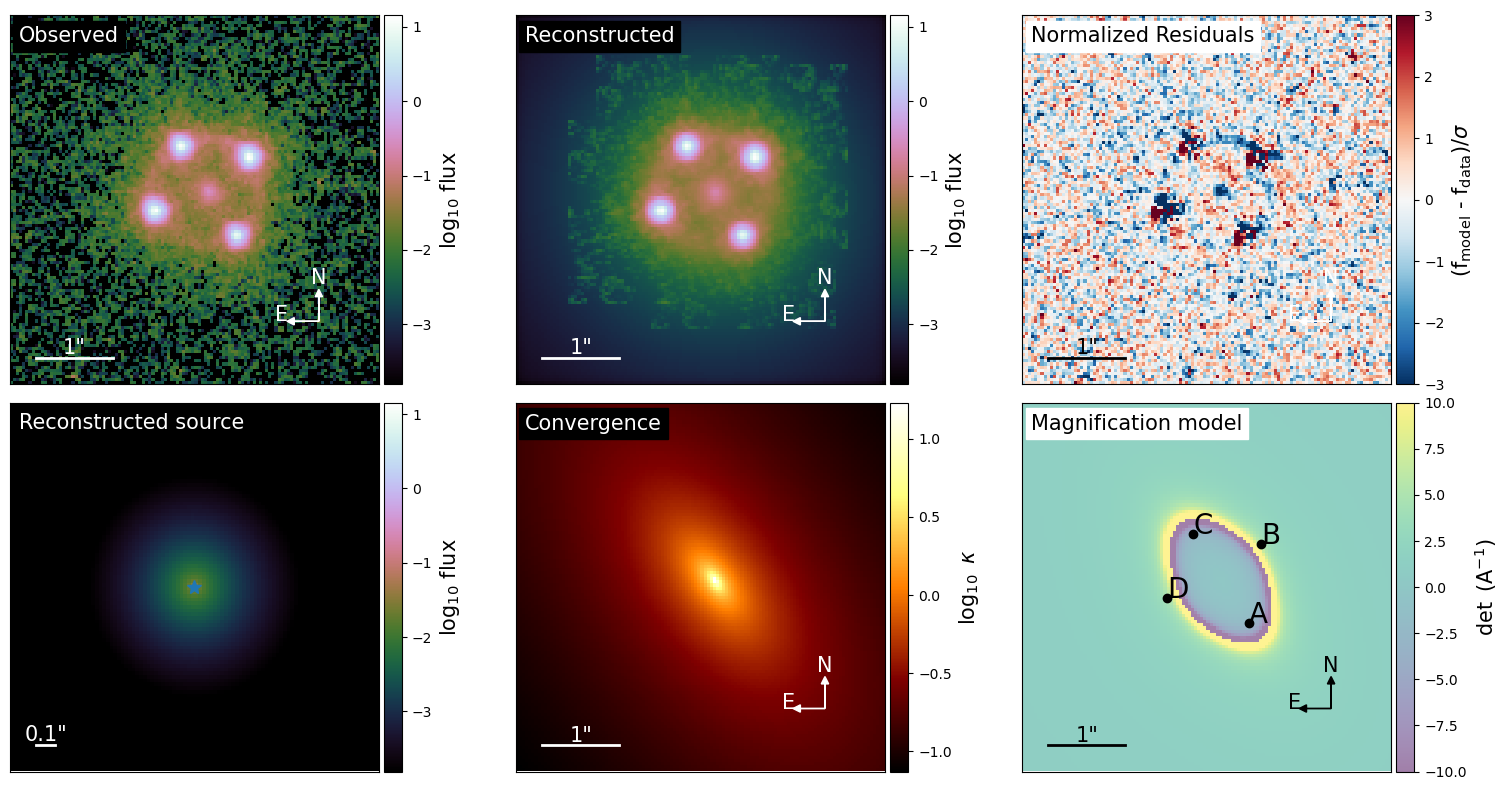

In [14]:
fig = output.plot_model_overview(lens_name="lensed_quasar", model_id="example")

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [15]:
output.get_kwargs_data_joint("lensed_quasar")

{'multi_band_list': [[{'background_rms': 0.005410915240645,
    'dec_at_xy_0': -2.399111017814023,
    'exposure_time': array([[697.0825 , 503.49606, 679.8957 , ..., 934.47833, 959.3858 ,
            956.0639 ],
           [940.014  , 695.45166, 615.2481 , ..., 620.5439 , 962.6702 ,
            741.8869 ],
           [800.86237, 923.98846, 628.4555 , ..., 790.8768 , 964.92914,
            933.5784 ],
           ...,
           [960.678  , 958.5928 , 962.2539 , ..., 961.1977 , 963.7092 ,
            956.88763],
           [951.48285, 955.8999 , 964.3244 , ..., 959.7375 , 960.80963,
            961.0066 ],
           [605.2956 , 920.7195 , 952.1291 , ..., 964.6863 , 956.1972 ,
            957.31537]], dtype=float32),
    'image_data': array([[ 4.3253470e-03, -2.5759672e-03, -2.8244085e-03, ...,
             6.6894642e-04, -1.6578455e-03, -1.1933473e-04],
           [-2.3312846e-03,  2.5787833e-03,  8.7178568e-04, ...,
             3.5077034e-04,  5.7318993e-03, -4.9318239e-04],
         

In [16]:
output.get_kwargs_data_joint("lensed_quasar")["multi_band_list"][0][1]

{'kernel_point_source': array([[1.08517975e-05, 1.61979014e-05, 1.92820949e-05, ...,
         2.63056079e-05, 2.11837862e-05, 1.08517975e-05],
        [2.11837862e-05, 2.52514163e-05, 1.74057929e-05, ...,
         1.17993591e-05, 2.52514163e-05, 1.61979014e-05],
        [2.63056079e-05, 1.17993591e-05, 2.68405922e-05, ...,
         2.68405922e-05, 1.74057929e-05, 1.92820949e-05],
        ...,
        [1.92820949e-05, 1.74057929e-05, 2.68405922e-05, ...,
         2.68405922e-05, 1.17993591e-05, 2.63056079e-05],
        [1.61979014e-05, 2.52514163e-05, 1.17993591e-05, ...,
         1.74057929e-05, 2.52514163e-05, 2.11837862e-05],
        [1.08517975e-05, 2.11837862e-05, 2.63056079e-05, ...,
         1.92820949e-05, 1.61979014e-05, 1.08517975e-05]]),
 'psf_variance_map': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

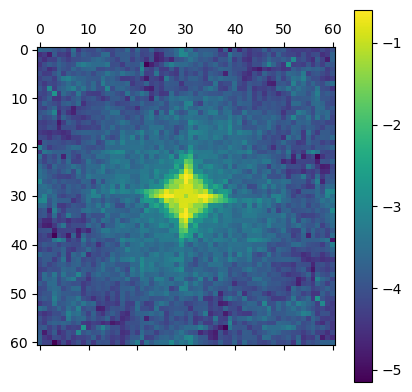

In [24]:
plt.matshow(
    np.log10(
        output.get_kwargs_data_joint("lensed_quasar")["multi_band_list"][0][1][
            "psf_variance_map"
        ]
    )
)
plt.colorbar()

In [18]:
output.load_output(lens_name="lensed_quasar", model_id="example")

output.kwargs_result

{'kwargs_lens': [{'theta_E': 0.7229929749617015,
   'gamma': 2.0003139196189164,
   'e1': -0.10179348551777942,
   'e2': 0.2947516295353344,
   'center_x': -0.1684760594391555,
   'center_y': 0.053994661244596905},
  {'gamma_ext': 0.08860131524267918,
   'psi_ext': -2.3087144221536104,
   'ra_0': 0,
   'dec_0': 0}],
 'kwargs_source': [{'amp': 1,
   'R_sersic': 0.19940543157776147,
   'n_sersic': 1.8590872541394659,
   'e1': -0.022051194749974946,
   'e2': 0.005622285849231365,
   'center_x': -0.15289074048345486,
   'center_y': 0.08998979763347931}],
 'kwargs_lens_light': [{'amp': 1,
   'R_sersic': 1.3366219541258988,
   'n_sersic': 4.0,
   'e1': -0.005001067702648437,
   'e2': 0.010029378397292524,
   'center_x': -0.17319856681754348,
   'center_y': 0.06897539201103259}],
 'kwargs_ps': [{'ra_image': array([-0.53127233, -0.68990883,  0.19124752,  0.53466141]),
   'dec_image': array([-0.48765374,  0.53502179,  0.67254694, -0.1627208 ]),
   'point_amp': array([1., 1., 1., 1.])}],
 'kwarg

When necessary, the settings of the model run -- that was read out of the 'config_{lens_name}.yml' file -- can be accessed through the `output.model_settings` variable.

In [11]:
output.model_settings

{'band': ['F814W'],
 'model': {'lens': ['EPL', 'SHEAR_GAMMA_PSI'],
  'lens_light': ['SERSIC_ELLIPSE'],
  'source_light': ['SERSIC_ELLIPSE'],
  'point_source': ['LENSED_POSITION']},
 'lens_option': {'centroid_init': [-0.2, 0.04]},
 'lens_light_option': {'fix': {'0': {'n_sersic': 4.0}}},
 'source_light_option': {'n_max': [4]},
 'point_source_option': {'ra_init': [-0.54, -0.69, 0.19, 0.55],
  'dec_init': [-0.48, 0.54, 0.68, -0.16],
  'bound': 0.1},
 'fitting': {'pso': True,
  'pso_settings': {'num_particle': 50, 'num_iteration': 50},
  'psf_iteration': True,
  'psf_iteration_settings': {'stacking_method': 'median',
   'num_iter': 50,
   'psf_iter_factor': 0.5,
   'keep_psf_variance_map': True,
   'psf_symmetry': 4,
   'block_center_neighbour': 0.2},
  'sampling': False,
  'sampler': 'emcee',
  'sampler_settings': {'n_burn': 0, 'n_run': 100, 'walkerRatio': 2}},
 'numeric_option': {'supersampling_factor': [2]},
 'pixel_size': [0.04000931090534775]}